# LABORATORIO DOS
Alexa Bravo  18831  
Jose Garavito 18071  
Marzo 15, 2022 

In [1]:
#importamos las librerías necesarias para trabajar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Task 1 -Regresión Polinomial 

In [2]:
#Cargamos los datos.
df = pd.read_csv('Walmart.csv')
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#### Variables

**Variables Independientes:** Store, Date, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment  
**Variable Dependiente/A Predecir:** Weekly_Sales

In [3]:
#Separamos la columna "Date" en dia(d), mes(m) y año(a)
df.Date=pd.to_datetime(df.Date)
df['d'] = df.Date.dt.weekday
df['m'] = df.Date.dt.month
df['a'] = df.Date.dt.year

In [4]:
#Quitamos la columna de "Date"
df.drop(['Date'], axis=1, inplace=True)

In [5]:
df.head(5)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,d,m,a
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [6]:
#Separamos las variables dependientes e independientes
x = df[['Store', 'Temperature','Fuel_Price', 'Unemployment', 'Holiday_Flag', 'CPI', 'd', 'm', 'a']]
y = df['Weekly_Sales']

In [7]:
#Referencia: https://aprendeia.com/algoritmo-regresion-polinomial-machine-learning-practica-con-python/
#Separamos los datos en conjunto de prueba y entrenamiento, indicando el 30% test y 70% train. 
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3)

In [8]:
#Definimos el grado del polinomio 
polynomial = PolynomialFeatures(degree= 6)

In [9]:
#Se transforman las caracteristicas de los datos, a unas de mayor grado
xTrainP = polynomial.fit_transform(xTrain)
xTestP = polynomial.fit_transform(xTest)

In [10]:
#Definimos el algoritmo a utilizar 
lr = linear_model.LinearRegression()

In [11]:
#Entrenamos el modelo
lr.fit(xTrainP, yTrain)

LinearRegression()

In [12]:
#Realizamos una predicción
yPred = lr.predict(xTestP)

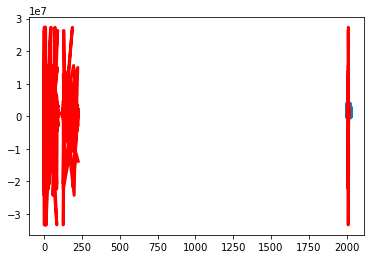

In [13]:
plt.scatter(xTest['a'], yTest)
plt.plot(xTest, yPred, color='red', linewidth=3)
plt.show()

In [14]:
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)

Valor de la pendiente o coeficiente "a":
[-2.28826428e+00 -3.24055133e+00  2.39196200e-01 ...  1.59835611e-05
  5.73922047e-07  2.45027096e-08]


In [15]:
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)

Valor de la intersección o coeficiente "b":
-187991652074.25742


#### Precición del Modelo

In [16]:
print('Precisión del modelo con grado 3:')
print(lr.score(xTrainP, yTrain))
rmse = np.sqrt(mean_squared_error(yTest,yPred))
r2 = r2_score(yTest,yPred)

Precisión del modelo con grado 3:
0.44099623730203075


In [25]:
print('Precisión del modelo con grado 4:')
print(lr.score(xTrainP, yTrain))

Precisión del modelo con grado 4:
0.672750882988767


In [34]:
print('Precisión del modelo con grado 5:')
print(lr.score(xTrainP, yTrain))

Precisión del modelo con grado 5:
0.8045829734947362


In [17]:
print('Precisión del modelo con grado 6:')
print(lr.score(xTrainP, yTrain))

Precisión del modelo con grado 6:
0.8383406675976772


### Task 2 -K-Nearest Neighbors

In [44]:
#Cargamos los datos.
df = pd.read_csv('Oranges vs Grapefruit.csv')
df.head(5)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [67]:
#Volvemos binaria la variable name. 
df['name'] = df['name'].replace(to_replace='orange', value=0)
df['name'] = df['name'].replace(to_replace='grapefruit', value=1)
df.head(5)

,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9


In [109]:
#Definimos los datos de "x" y "y"
x = df[['diameter', 'weight', 'red', 'blue', 'green']]
y = df['name']

In [130]:
#Separamos los datos en test y train 
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=123)

In [131]:
#https://medium.com/analytics-vidhya/implementing-k-nearest-neighbours-knn-without-using-scikit-learn-3905b4decc3c
class KNN:
    def __init__(self, k):
        self.k = k
    #Ajustamos el modelo    
    def fit(self, x, y):
        self.xTrain = x
        self.yTrain = y
    
    #Utilizamos el algoritmo Euclidiano para calcular las distancias
    def distance(self, x1, x2):
        distance = scipy.spatial.distance.euclidean(x1, x2)
        
    #Guarda las K distancias mas cortas con sus indices.
    def predict(self, xTest):
        final_output = []
        for i in range(len(xTest)):
            d = []
            votes = []
            for j in range(len(xTrain)):
                dist = scipy.spatial.distance.euclidean(xTrain[j] , xTest[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(yTrain[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output
    
    #Compara el resultado de la prueba, con el resultado real
    def score(self, xTest, yTest):
        predictions = self.predict(xTest)
        return (predictions == yTest).sum() / len(yTest)

In [132]:
##Definimos y cargamos el modelo 
modelKNN = KNN(k=6)
modelKNN.fit(xTrain,yTrain)

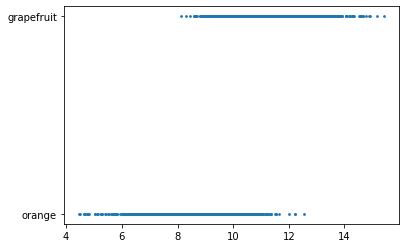

In [133]:
#Vemos el funcionamiento
plt.scatter(xTest['diameter'], yTest, s=3)
plt.show()

### Task 3 -Support Vector Machine 

In [103]:
#Cargamos los datos.
df = pd.read_csv('Oranges vs Grapefruit.csv')
df.head(5)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [19]:
#Eliminamos las columnas "red", "green" y "blue"
df.drop(['red'], axis=1, inplace=True)
df.drop(['green'], axis=1, inplace=True)
df.drop(['blue'], axis=1, inplace=True)
df.head(5)

,name,diameter,weight
0,orange,2.96,86.76
1,orange,3.91,88.05
2,orange,4.42,95.17
3,orange,4.47,95.60
4,orange,4.48,95.76


In [20]:
#Volvemos binaria la variable name. 
df['name'] = df['name'].replace(to_replace='orange', value=0)
df['name'] = df['name'].replace(to_replace='grapefruit', value=1)
df.head(5)

,name,diameter,weight
0,0,2.96,86.76
1,0,3.91,88.05
2,0,4.42,95.17
3,0,4.47,95.60
4,0,4.48,95.76


In [21]:
#Definimos los datos de "x" y "y"
x = df[['diameter', 'weight']]
y = df['name']

In [23]:
#Separamos los datos en test y train 
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=123)

In [28]:
#Importamos y cargamos el modelo 
from sklearn import svm, datasets
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
modelSVM = svm.SVC()
modelSVM.fit(xTrain, yTrain)

SVC()

In [29]:
#Creamos una predicción antes del tuning
predictions = modelSVM.predict(xTest)
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1485
           1       0.89      0.85      0.87      1515

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.88      0.87      0.87      3000



In [30]:
from sklearn.model_selection import GridSearchCV

#Definimos el rango del parametro
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [32]:
# Reajustamos un estimador utilizando los mejores parámetros encontrados en todo el conjunto de datos.
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, cv=3,verbose = 3)

#Ajustamos el modelo 
grid.fit(xTrain, yTrain)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV 2/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV 3/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV 1/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 2/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV 3/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 1/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.7s
[CV 2/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.5s
[CV 3/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV 1/3] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.6s
[CV 2/3] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.5s
[CV 3/3] END .................C=0.1, gamma=0.001

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [33]:
# Vemos el mejor parametro luego del tuning
print(grid.best_params_)
 
#Vemos como se ve nuestro modelo luego de los ajustes
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1)


In [35]:
grid_predictions = grid.predict(xTest)
 
# Vemos el reporte de clasificacion 
print(classification_report(yTest, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1485
           1       1.00      1.00      1.00      1515

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

